In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load dataset from online
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


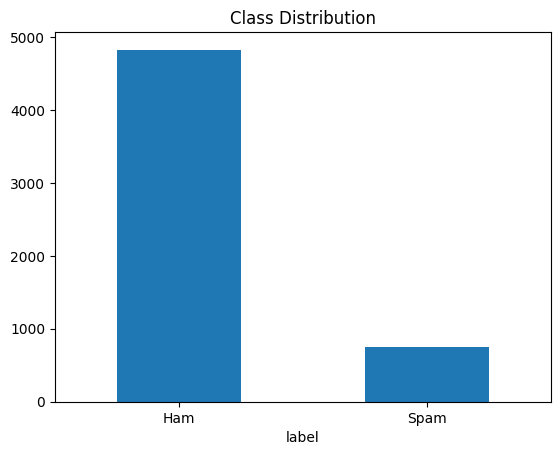

In [3]:
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check class balance
df['label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.show()


In [4]:
X = df['message']
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [5]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)


In [6]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))


Naive Bayes Accuracy: 0.97847533632287
Logistic Regression Accuracy: 0.9695067264573991

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [7]:
sample = ["Congratulations! You've won a free ticket to the Bahamas. Call now!"]
sample_vec = tfidf.transform(sample)

print("Prediction (1 = Spam, 0 = Ham):", nb.predict(sample_vec)[0])


Prediction (1 = Spam, 0 = Ham): 0
